<a href="https://colab.research.google.com/github/Gcango/Filmes_Exibi--o_Prod_Investimento/blob/main/Analise_Produtoras_Generos_Filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A analise feita a este dataset, teve como objectivo explorar profundamente os dados relacionados a produtoras de filmes num determinado (tempo). No dataset constam os direitores, data de lançamento do filme, titulo, genero, produtoras, investimento entre outros dados. No decorrer da analise estão feita perguntas e as devidas respostas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
dados = pd.read_csv("/content/Filmes-Dataset.csv", encoding='latin1')

In [4]:
dados.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [6]:
print(f"O dataset possui {dados.shape[0]} linhas e {dados.shape[1]}  colunas.")

O dataset possui 608 linhas e 18  colunas.


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Day of Week             608 non-null    object 
 1   Director                608 non-null    object 
 2   Genre                   608 non-null    object 
 3   Movie Title             608 non-null    object 
 4   Release Date            608 non-null    object 
 5   Studio                  608 non-null    object 
 6   Adjusted Gross ($mill)  608 non-null    object 
 7   Budget ($mill)          608 non-null    float64
 8   Gross ($mill)           608 non-null    object 
 9   IMDb Rating             608 non-null    float64
 10  MovieLens Rating        608 non-null    float64
 11  Overseas ($mill)        608 non-null    object 
 12  Overseas%               608 non-null    float64
 13  Profit ($mill)          608 non-null    object 
 14  Profit%                 608 non-null    fl

In [9]:
dados.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [10]:
dados.describe()

,Budget ($mill),IMDb Rating,MovieLens Rating,Overseas%,Profit%,Runtime (min),US ($mill),Gross % US
count,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000,608.000000
mean,92.467928,6.923849,3.340378,57.698849,719.278783,117.781250,167.135197,42.301151
std,59.421407,0.925890,0.454071,12.334237,1942.807248,23.179122,92.465903,12.334237
min,0.600000,3.600000,1.490000,17.200000,7.700000,30.000000,0.000000,0.000000
25%,45.000000,6.375000,3.037500,49.900000,201.850000,100.000000,106.950000,33.700000
50%,80.000000,6.900000,3.365000,58.200000,338.550000,116.000000,141.700000,41.800000
75%,130.000000,7.600000,3.672500,66.300000,650.100000,130.250000,202.100000,50.100000
max,300.000000,9.200000,4.500000,100.000000,41333.300000,238.000000,760.500000,82.800000


In [ ]:
#Quais os dias da semana com mais lançamento de Filmes?

In [43]:
fil_semana = dados.groupby('Day of Week')['Movie Title'].count().reset_index().sort_values(by='Movie Title', ascending=False)
fil_semana

,Day of Week,Movie Title
0,Friday,448
5,Wednesday,119
3,Thursday,27
4,Tuesday,10
1,Saturday,3
2,Sunday,1


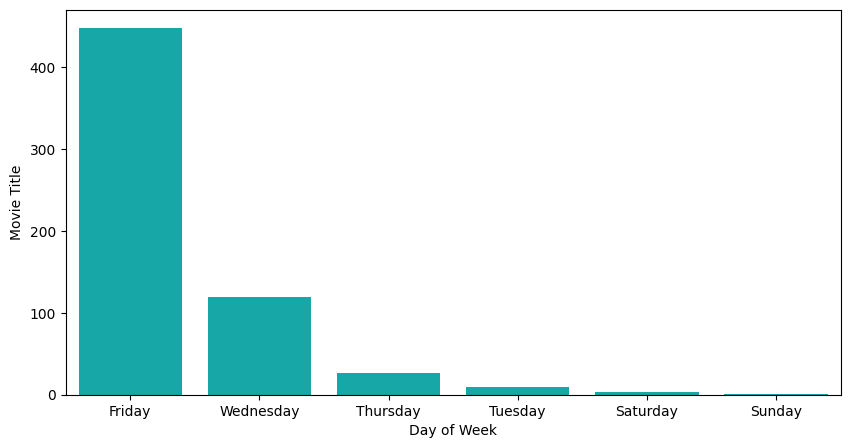

In [44]:
plt.figure(figsize=(10,5))
plot = sns.barplot(x='Day of Week', y='Movie Title', data =fil_semana, color='c')
plt.show()

In [ ]:
#Quantos Studios aparecem nesta Datasets e Quais são?

In [35]:
qtd_studio = dados['Studio'].nunique()
print(f"Neste Dataset Estão cadastrados {qtd_studio} Studios, o que também podemos chamar-lhes de Produtoras.")

Neste Dataset Estão cadastrados 36 Studios, o que também podemos chamar-lhes de Produtoras.


In [36]:
qtd_studio = dados['Studio'].unique()
print(f" Os seus nomes são \n{qtd_studio}")

 Os seus nomes são 
['Buena Vista Studios' 'Lionsgate' 'Sony' 'Universal' 'Paramount Pictures'
 'WB' 'Weinstein Company' 'UA Entertainment' 'WB/New Line'
 'New Line Cinema' 'Fox' 'TriStar' 'Relativity Media' 'Screen Gems'
 'StudioCanal' 'Fox Searchlight Pictures' 'MiraMax' 'Path_ Distribution'
 'DreamWorks' 'Lionsgate Films' 'Revolution Studios' 'Dimension Films'
 'USA' 'Lionsgate/Summit' 'Sony Picture Classics'
 'Pacific Data/DreamWorks' 'Disney' 'Art House Studios'
 'Colombia Pictures' 'Gramercy Pictures' 'Summit Entertainment'
 'Vestron Pictures' 'MGM' 'Orion' 'IFC' 'New Market Films']


In [ ]:
#Qual é o ORÇAMENTO de cada Studio?

In [37]:
orcamento = dados.groupby('Studio')['Budget ($mill)'].sum().reset_index().sort_values(by='Budget ($mill)', ascending=False)
orcamento

,Studio,Budget ($mill)
1,Buena Vista Studios,10905.5
33,WB,10099.5
6,Fox,8026.5
24,Sony,6725.0
31,Universal,6173.5
19,Paramount Pictures,5526.5
18,Pacific Data/DreamWorks,2431.0
15,New Line Cinema,1214.0
5,DreamWorks,880.0
10,Lionsgate,617.0


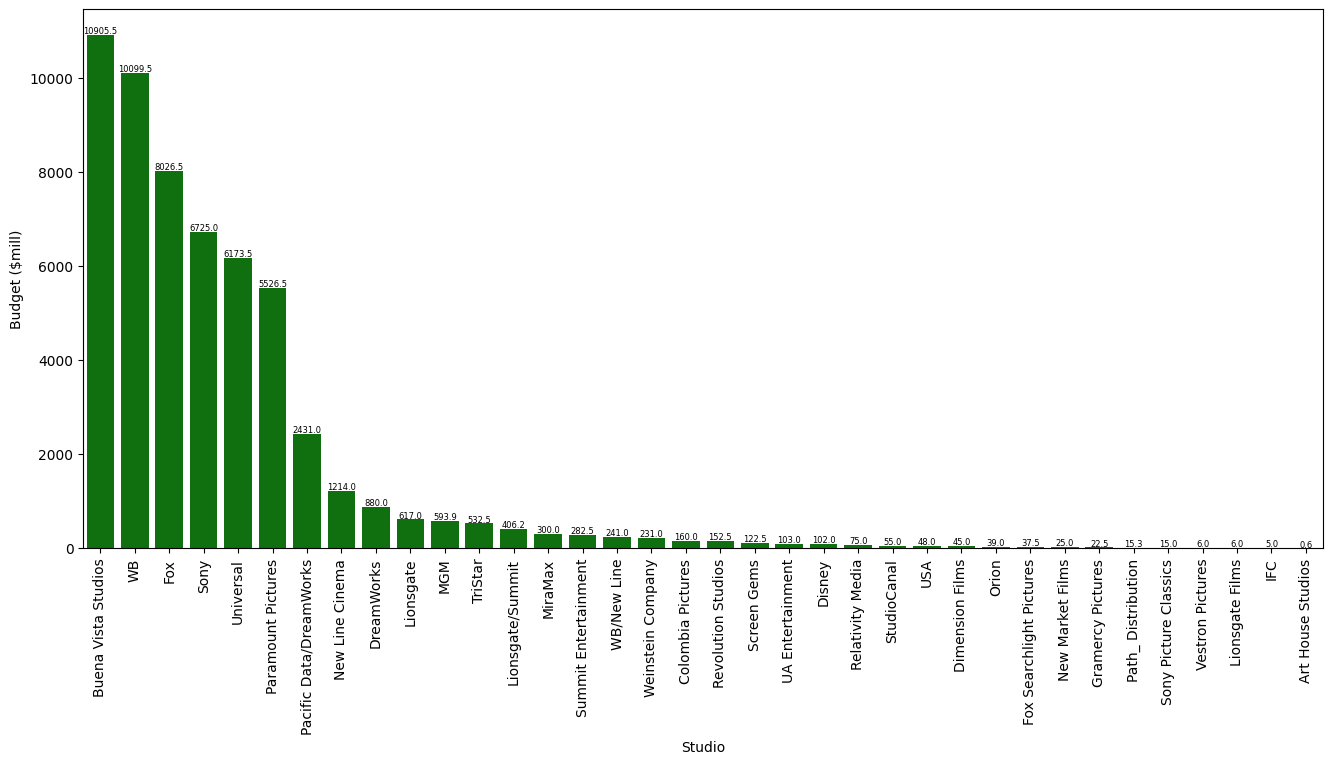

In [50]:
plt.figure(figsize=(16,7))
plot = sns.barplot(x='Studio', y='Budget ($mill)', data =orcamento, color='g')
for i in plot.patches:
    plot.annotate(i.get_height(),
                  (i.get_x() + i.get_width() / 2, i.get_height()),
                  ha='center',
                  va='baseline',
                  fontsize=6,
                  color='black',
                  xytext=(0, 1),
                  textcoords='offset points')
plt.xticks(rotation=90)
plt.show()

In [ ]:
#Quais são os Generos de filmes que podem ser encontrados e enumera-los?

In [53]:
genero = dados['Genre'].nunique()
print(f"No total, estão disponível {genero} Genero")

No total, estão disponível 15 Genero


In [54]:
genero = dados['Genre'].unique()
print(f"Esses Generos são: \n{genero}")

Esses Generos são: 
['action' 'comedy' 'adventure' 'horror' 'animation' 'biography' 'drama'
 'musical' 'sci-fi' 'crime' 'romance' 'fantasy' 'mystery' 'thriller'
 'documentary']


In [ ]:
#Quantifica os Generos encotrados?

In [56]:
qtd_fil_genero = dados['Genre'].value_counts()
qtd_fil_genero

action         236
animation       97
comedy          91
drama           52
adventure       50
sci-fi          16
thriller        15
biography       14
crime           10
horror           8
romance          6
fantasy          6
mystery          3
musical          2
documentary      2
Name: Genre, dtype: int64

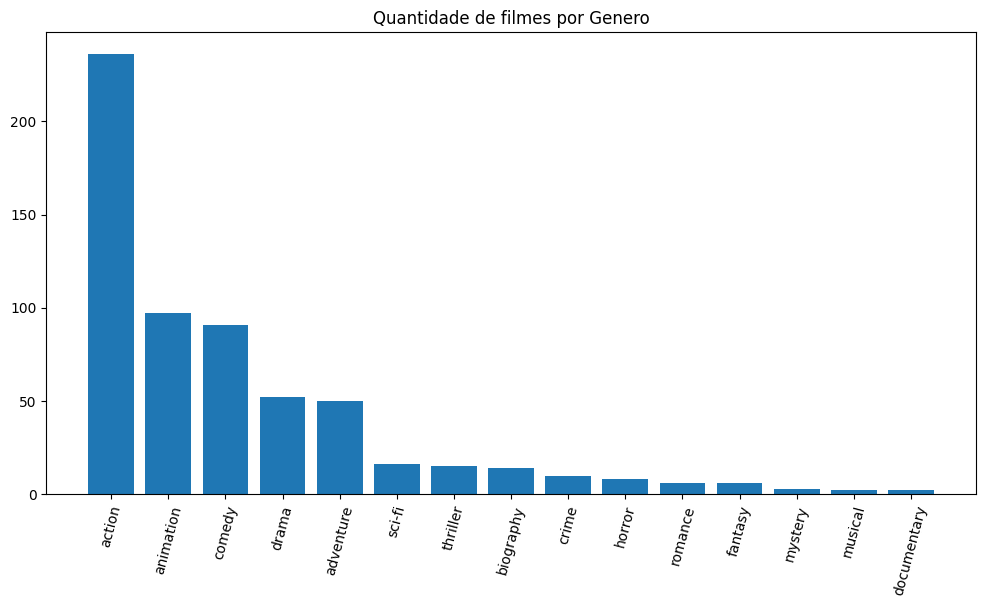

In [61]:
plt.figure(figsize=(12,6))
plt.bar(qtd_fil_genero.index, qtd_fil_genero.values)
plt.xticks(rotation=75)
plt.title('Quantidade de filmes por Genero')
plt.show()

In [ ]:
#Mostra uma tabela com os filmes de Genero Acção

In [59]:
dados[(dados.Genre == 'action')]

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6
5,Friday,David Ayer,action,Fury,17/10/2014,Sony,212.8,80.0,211.8,5.8,2.85,126,59.5,131.8,164.8,134,85.8,40.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
585,Friday,Gore Verbinski,action,Pirates of the Caribbean: Dead Man's Chest,7/07/2006,Buena Vista Studios,"1,257.70",225.0,"1,066.20",7.3,3.47,642.9,60.3,841.2,373.9,151,423.3,39.7
588,Friday,Joss Whedon,action,Avengers: Age of Ultron,1/05/2015,Buena Vista Studios,"1,371.60",250.0,"1,371.60",7.9,3.75,919.1,67.0,"1,121.60",448.6,141,452.5,33.0
594,Friday,James Wan,action,Furious 7,3/04/2015,Universal,"1,511.60",190.0,"1,511.60",7.6,3.34,"1,160.60",76.8,"1,321.60",695.6,137,351.0,23.2
596,Friday,Joss Whedon,action,Marvel's The Avengers,4/05/2012,Buena Vista Studios,"1,572.90",220.0,"1,518.60",8.2,3.95,895.2,59.0,"1,298.60",590.3,143,623.4,41.0


In [ ]:
#Faça uma analise do filmes do Studio Fox ou WB criando filtro.

In [62]:
dados2 = dados[(dados.Studio == 'Fox') | (dados.Studio == 'WB')]

In [64]:
dados2.Studio.unique()

array(['WB', 'Fox'], dtype=object)

In [65]:
dados2.head(5)

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
10,Friday,Eric Brevig,animation,Yogi Bear,17/12/2010,WB,219.9,80.0,201.6,4.5,2.17,101.3,50.3,121.6,152.0,80,100.2,49.7
24,Friday,Todd Phillips,comedy,Due Date,5/11/2010,WB,231,65.0,211.8,6.6,3.17,111.2,52.5,146.8,225.9,95,100.5,47.5
27,Friday,Martin Campbell,action,Green Lantern,17/06/2011,WB,232.5,200.0,219.9,5.7,2.87,103.3,47.0,19.9,10.0,114,116.6,53.0
28,Wednesday,Baz Luhrmann,adventure,Australia,26/11/2008,Fox,233.4,78.0,211.3,7.6,3.50,161.8,76.6,133.3,170.9,165,49.6,23.4
30,Friday,Paul Feig,action,The Heat,28/06/2013,Fox,234.7,43.0,229.9,6.6,4.07,70.3,30.6,186.9,434.7,117,159.6,69.4


In [ ]:
#Cria filtro com os Generos 'action', 'adventure','animation','comedy', 'drama'

In [67]:
filtro_genero = ['action', 'adventure','animation','comedy', 'drama']
dados2 = dados[dados.Genre.isin(filtro_genero)]

In [68]:
dados2.Genre.unique()

array(['action', 'comedy', 'adventure', 'animation', 'drama'],
      dtype=object)

In [ ]:
#Cria filtro com os Studios 'Buena Vista Studios','Fox','Paramount Pictures','Sony','Universal','WB'

In [69]:
filtro_studio = ['Buena Vista Studios','Fox','Paramount Pictures','Sony','Universal','WB']
dados3 = dados2[dados2.Studio.isin(filtro_studio)]

In [70]:
print(dados3.Studio.unique())

['Buena Vista Studios' 'Sony' 'Universal' 'WB' 'Paramount Pictures' 'Fox']


In [74]:
len(dados3)

423

In [75]:
dados3.columns

Index(['Day of Week', 'Director', 'Genre', 'Movie Title', 'Release Date',
       'Studio', 'Adjusted Gross ($mill)', 'Budget ($mill)', 'Gross ($mill)',
       'IMDb Rating', 'MovieLens Rating', 'Overseas ($mill)', 'Overseas%',
       'Profit ($mill)', 'Profit%', 'Runtime (min)', 'US ($mill)',
       'Gross % US'],
      dtype='object')

In [ ]:
#Faça analise por meio da plotagem da %de receita bruta doméstica por gênero

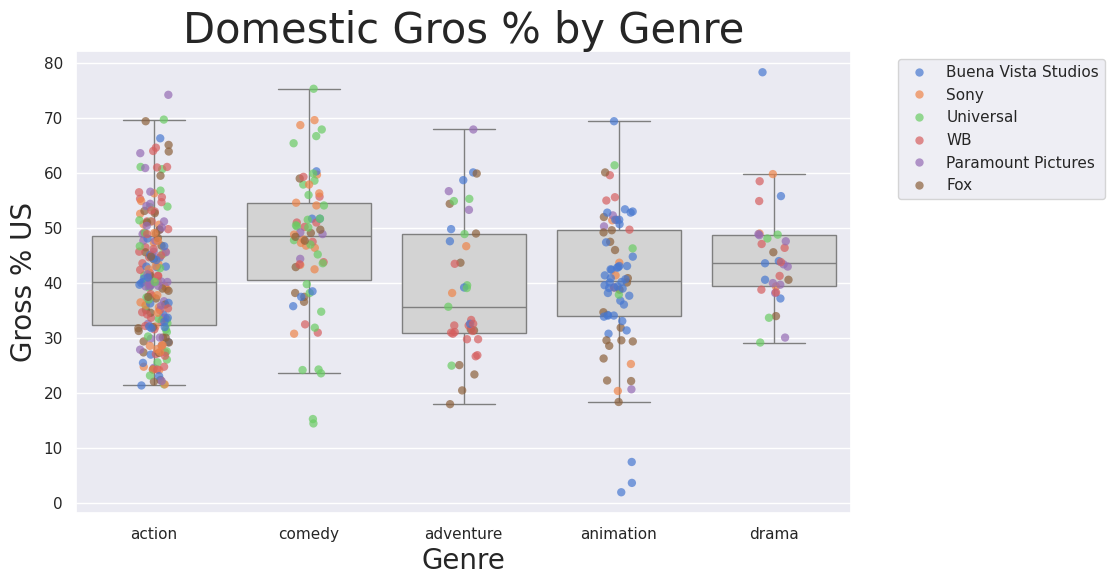

In [80]:
#plotagem
plt.figure(figsize=(10,6))
sns.set(style='darkgrid', palette='muted', color_codes = True)

ax = sns.boxplot(data = dados3, x = 'Genre', y = 'Gross % US', orient='v', color = 'lightgray', showfliers = False)
plt.setp(ax.artists, alpha=0.5)

sns.stripplot(x = 'Genre', y = "Gross % US", data= dados3, jitter = True, size = 6, linewidth = 0, hue = 'Studio', alpha = 0.7)

ax.axes.set_title('Domestic Gros % by Genre', fontsize=30)
ax.set_xlabel('Genre', fontsize = 20)
ax.set_ylabel('Gross % US', fontsize = 20)

ax.legend(bbox_to_anchor=(1.05,1), loc = 2)
plt.show()

In [81]:
dados.head()

,Day of Week,Director,Genre,Movie Title,Release Date,Studio,Adjusted Gross ($mill),Budget ($mill),Gross ($mill),IMDb Rating,MovieLens Rating,Overseas ($mill),Overseas%,Profit ($mill),Profit%,Runtime (min),US ($mill),Gross % US
0,Friday,Brad Bird,action,Tomorrowland,22/05/2015,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/2014,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/2014,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/2012,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/2013,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [98]:
#Analisa a coluna Rating

In [98]:
rating = dados.groupby('Movie Title')['IMDb Rating'].max().reset_index().sort_values(by='IMDb Rating', ascending=False)
rating.head(20)

,Movie Title,IMDb Rating
398,The Dark Knight,9.0
209,Inside Out,8.8
202,Inception,8.8
301,Philadelphia,8.8
141,Forrest Gump,8.8
440,The Lord of the Rings: The Fellowship of the Ring,8.8
445,The Matrix,8.7
441,The Lord of the Rings: The Two Towers,8.7
369,Star Wars,8.7
316,Raiders of the Lost Ark,8.6
